In [1]:
import shap
import joblib
import pickle
import matplotlib.pyplot as plt
import os

d:\Anaconda\envs\gpu_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def generate_shap_explanations(model, X, output_dir="shap_visualizations"):
    """
    Generates SHAP explanations for the model and saves visualizations.

    Parameters:
        model: Trained model (e.g., XGBoost, RandomForest).
        X: Feature matrix (DataFrame or array).
        output_dir: Directory to save SHAP visualizations.

    Returns:
        shap_values: Computed SHAP values for the dataset.
    """
    os.makedirs(output_dir, exist_ok=True)

    # Use TreeExplainer for tree-based models
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)

    # Summary Plot
    shap.summary_plot(shap_values, X, show=False)
    summary_path = os.path.join(output_dir, "summary_plot.png")
    plt.savefig(summary_path)
    plt.clf()  # Clear the plot for the next visualization

    # Feature Importance Plot
    shap.summary_plot(shap_values, X, plot_type="bar", show=False)
    importance_path = os.path.join(output_dir, "feature_importance.png")
    plt.savefig(importance_path)
    plt.clf()

    print(f"SHAP visualizations saved in {output_dir}")
    return shap_values

In [6]:
# Load the best model and the test dataset
best_model = joblib.load('../Models/fraud_detection_xgboost_model.pkl')
X_test = pickle.load(open('../dataset/splits_pkl/X_test.pkl', 'rb'))



In [7]:
shap_values = generate_shap_explanations(best_model, X_test)


SHAP visualizations saved in shap_visualizations


<Figure size 800x950 with 0 Axes>

In [8]:
# Create the SHAP explainer for your model
explainer = shap.TreeExplainer(best_model)  # Assuming 'model' is your trained XGBoost/Random Forest model
shap_values = explainer.shap_values(X_test)

shap.initjs()  # Load SHAP's JavaScript visualizations

# Generate force plot for the first prediction
force_plot = shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values[0, :],
    features=X_test.iloc[0, :]
)


In [9]:
shap.save_html("shap_visualizations/force_plot.html", force_plot)
print("Force plot saved to shap_visualizations/force_plot.html")


Force plot saved to shap_visualizations/force_plot.html


Dependence plot for V1 saved.


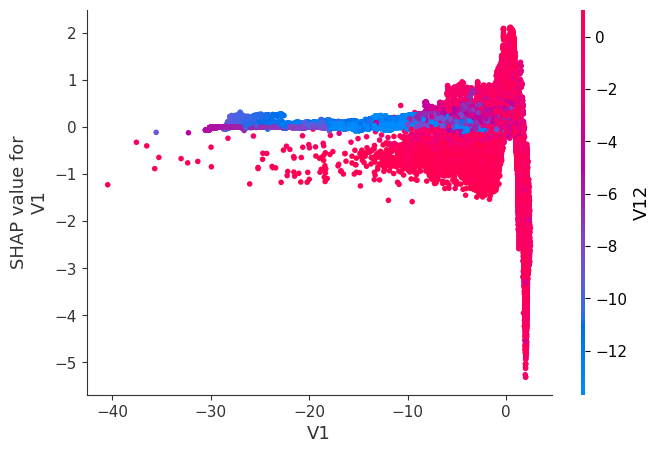

In [10]:
shap.dependence_plot("V1", shap_values, X_test, show=False)
plt.savefig("shap_visualizations/dependence_plot_V1.png")
print("Dependence plot for V1 saved.")
